# Import libraries and dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from scipy import stats
from scipy.stats import norm, skew

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [5]:
df = pd.read_csv('/Users/williamliang/Desktop/ds/loans/sample.csv', index_col=0)

In [6]:
df.head()

,age,occupied_months_at_30_day_delinquency,number_of_late_payments,30_day_delinquency,60_day_delinquency,90_day_delinquency,90_plus_day_delinquency
0,40,6,2,0.000000,0.0,0.0,0.0
1,27,10,0,325.599106,0.0,0.0,0.0
2,51,39,1,0.000000,0.0,0.0,0.0
3,29,43,0,0.000000,0.0,0.0,0.0
4,58,6,0,0.000000,0.0,0.0,0.0


Each row contains information about a tenant, including:
1. age: tenant age
2. occupied_months_at_30_day_delinquency: number of months resided in the unit at the time of 30-day delinquency 
3. number_of_late_payments: total number of payments that were past the due dates
4. 30_day_delinquency: total amount of payments that haven't been made 1 to 30 days past the due date
5. 60_day_delinquency: total amount of payments that haven't been made 30 to 60 days past the due date 
6. 90_day_delinquency: total amount of payments that haven't been made 60 to 90 days past the due date
7. **90_plus_day_delinquency (target variable)**: total amount of payments that haven't been made over 90 days past the due date

In [7]:
df.isnull().sum()
# Dataset has no missing data

age                                      0
occupied_months_at_30_day_delinquency    0
number_of_late_payments                  0
30_day_delinquency                       0
60_day_delinquency                       0
90_day_delinquency                       0
90_plus_day_delinquency                  0
dtype: int64

In [8]:
df.shape
# Dataset contains information on 5000 tenants and 7 features

(5000, 7)

In [9]:
df.info()
# Data is already in numerical format, no data transformation required. There are also no categorical variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    5000 non-null   int64  
 1   occupied_months_at_30_day_delinquency  5000 non-null   int64  
 2   number_of_late_payments                5000 non-null   int64  
 3   30_day_delinquency                     5000 non-null   float64
 4   60_day_delinquency                     5000 non-null   float64
 5   90_day_delinquency                     5000 non-null   float64
 6   90_plus_day_delinquency                5000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 312.5 KB


# Part I. Exploratory Analysis

Columns regarding delinquencies have high means and standard deviations but medians of 0, suggesting that they may contain a majority of zeros with high outlying figures

In [10]:
df.describe()

,age,occupied_months_at_30_day_delinquency,number_of_late_payments,30_day_delinquency,60_day_delinquency,90_day_delinquency,90_plus_day_delinquency
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.521400,27.424200,0.373000,173.427378,362.988946,446.259113,495.019994
std,15.197491,13.827223,0.581325,282.289170,743.133512,1096.350133,1469.194678
min,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,40.000000,1.000000,284.303605,334.911103,0.000000,0.000000
max,69.000000,51.000000,3.000000,1830.685892,6389.412645,8178.618531,14035.961222


In [11]:
df.head(1)

,age,occupied_months_at_30_day_delinquency,number_of_late_payments,30_day_delinquency,60_day_delinquency,90_day_delinquency,90_plus_day_delinquency
0,40,6,2,0.0,0.0,0.0,0.0


#### Intuition suggests relationship between:
- Delinquency periods: Tenant with a late delinquency period is likely to have an earlier one as well
- Late payments and delinquencies: Tenant with history of paying late is likely to have existing delinquencies
- Age and late payments/delinquencies: Certain age groups with less secure incomes may have higher likelihood of late payments and delinquencies

#### Data shows no correlation among features
There is little to no statistical relationship among the features, and regression analysis would not return any meaningful results.
This is likely due to the data being semi-randomly generated.

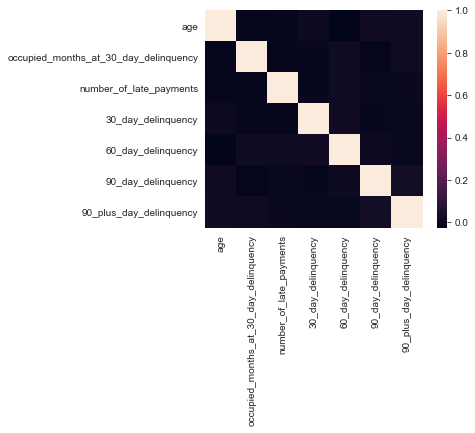

In [12]:
# Correlation Matrix among Features

corrmat = df.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True);

#### Distribution of each feature
- age and occupied_months_at_30_day_delinquency seemingly derived from uniform distribution. Real data should look more like a normal distribution
- dataset is highly imbalanced, with a majority of 0s (not due to missing values) for columns pertaining to late payments and delinquencies. This suggests that the majority of tenants in this dataset do not have delinquencies

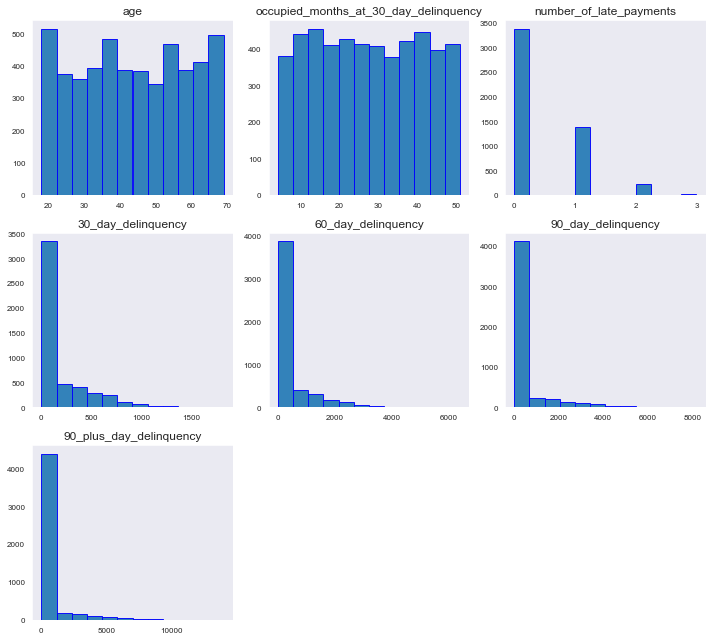

In [13]:
df.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

# artificially generated data and positively skewed
# age group but uniformly distributed

The data imbalance will be problematic in building a model for prediction, as the model may become very accurate in predicting tenants who do not have 90+ day delinquencies, yet very inaccurate at predicting tenants with 90+ day delinquencies. 

In the insurance industry, it is much more important to be able to identify the high risk tenants, to either charge them higher premiums or reject their business altogether. Recall may therefore be a more meaningful metric than accuracy

# Part II. Feature Engineering

## Feature 1: Age_Group
Different age groups generally have different levels of income stability.
Thus, intuition suggests a relationship between age groups and delinquency,
where younger or older age groups without stable jobs may be more likely to be delinquent

In [14]:
bins = [18, 24, 34, 44, 54, 64, np.inf]
labels = [0,1,2,3,4,5]

df['Age_Group'] = pd.cut(df['age'], bins, labels=labels)

# One hot encode to engineer categorical age group column
df = pd.get_dummies(df)
df = df.rename(columns={"Age_Group_0": "18_to_24", 
                   "Age_Group_1": "25_to_34",
                   "Age_Group_2": "35_to_44",
                   "Age_Group_3": "45_to_54",
                   "Age_Group_4": "55_to_64",
                   "Age_Group_5": "65_and_older",
                  })

In [15]:
df.head()

,age,occupied_months_at_30_day_delinquency,number_of_late_payments,30_day_delinquency,60_day_delinquency,90_day_delinquency,90_plus_day_delinquency,18_to_24,25_to_34,35_to_44,45_to_54,55_to_64,65_and_older
0,40,6,2,0.000000,0.0,0.0,0.0,0,0,1,0,0,0
1,27,10,0,325.599106,0.0,0.0,0.0,0,1,0,0,0,0
2,51,39,1,0.000000,0.0,0.0,0.0,0,0,0,1,0,0
3,29,43,0,0.000000,0.0,0.0,0.0,0,1,0,0,0,0
4,58,6,0,0.000000,0.0,0.0,0.0,0,0,0,0,1,0


## Feature 2: late2duration_ratio (Ratio of Late Payments to Occupied Months at 30 Day Delinquency)

A ratio of a tenant's number of late payments to their number of months resided in the unit at the time of 30-day delinquency

A tenant with a high number of late payments and a short duration of stay is different from a tenant with a high number of late payments but a long duration of stay.

Total months resided would have been more ideal for this purpose

In [16]:
df.insert(2, 'late2duration_ratio', '')
df['late2duration_ratio'] = df['number_of_late_payments']/df['occupied_months_at_30_day_delinquency']

## Features 3-6: Binarizing delinquency

Binarizing each delinquency feature to identify tenants with delinquency, and tenants without.

Since rent is different for each tenant, it's possible that it is not the amount of delinquency but simply the presence of delinquencies that can predict the likelihood of a 90+ day delinquency. 

In [17]:
df.insert(5, 'has_30_day_delinquency', '')
df['has_30_day_delinquency'] = (df['30_day_delinquency']>0).astype(int)

In [18]:
df.insert(7, 'has_60_day_delinquency', '')
df['has_60_day_delinquency'] = (df['60_day_delinquency']>0).astype(int)

In [19]:
df.insert(9, 'has_90_day_delinquency', '')
df['has_90_day_delinquency'] = (df['90_day_delinquency']>0).astype(int)

## Features 7-8: Computing total delinquency and binarizing it

Computing the total delinquency of each tenant and binarizing to identify tenants with delinquencies and tenants without any delinquencies at all. This could reveal if tenants across the dataset have some sort of delinquency.

In [20]:
df['total_delinquency'] = df['30_day_delinquency'] + df['60_day_delinquency'] + df['90_day_delinquency']
df['has_delinquency'] = (df['total_delinquency']>0).astype(int)

## Feature 9: Binarizing target variable for prediction of likelihood that a tenant may have a 90+ day delinquency.

The research question asks for likelihood and estimated amount of 90+ day delinquency, hence this is both a classification and a regression question.

In [21]:
df.insert(11, 'has_90_plus_day_delinquency', '')
df['has_90_plus_day_delinquency'] = (df['90_plus_day_delinquency']>0).astype(int)

In [22]:
# Separate continuous and categorical columns
cont_cols = ['age', 'occupied_months_at_30_day_delinquency', 'late2duration_ratio', 'number_of_late_payments',
            '30_day_delinquency', '60_day_delinquency', '90_day_delinquency', '90_plus_day_delinquency',
           'total_delinquency']

cat_cols = ['has_30_day_delinquency', 'has_60_day_delinquency', 'has_90_day_delinquency', 'has_90_plus_day_delinquency',
           '18_to_24', '25_to_34', '35_to_44', '45_to_54', '55_to_64', '65_and_older', 'has_delinquency']

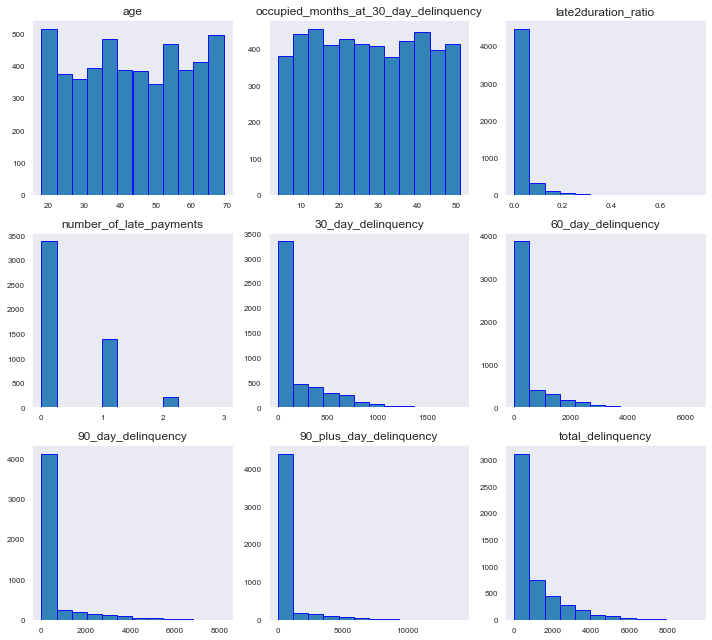

In [23]:
df.hist(column=cont_cols, figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

# separate quantitative and categorical columns

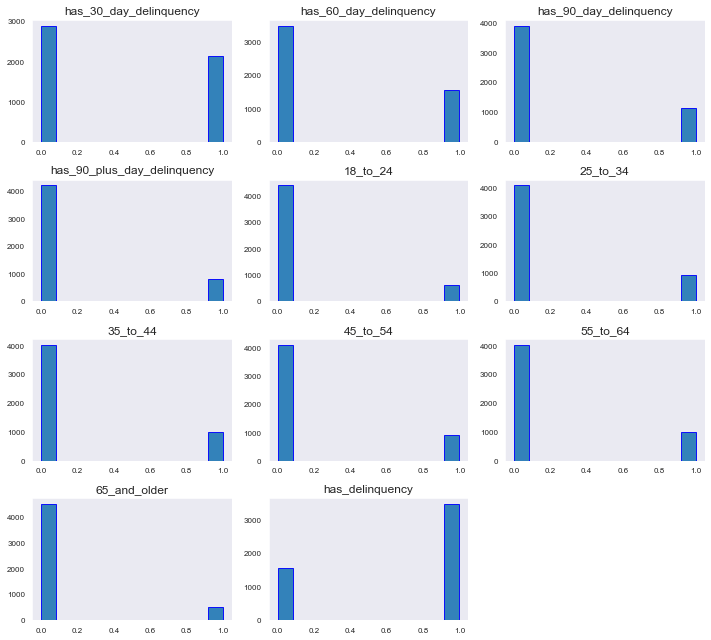

In [24]:
df.hist(column=cat_cols, figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

# separate quantitative and categorical columns

#### Distribution with updated features

Most notably, though the imbalance in data persists, it can be observed in the engineered 'has_delinquency' column that the majority of tenants have some kind of outstanding delinquency. This is in contrast to the pre-existing delinquency columns for each time period, which showed that most tenants did not have any delinquencies.

This means that in the data set, it is not the same people who owe delinquencies for each different time period. Rather, different tenants are responsible for the amounts owed in the respective delinquency periods, and the majority of tenants in the dataset have a delinquency.   

This is contrary to reality, as it seems logically inconsistent that a tenant with 60 or 90 day delinquencies would not also have a 30 day delinquency. In reality, correlation can be expected such that the same tenants are responsible for delinquencies owed across time periods.

Thus, this model is unlikely to be generalizeable to real data

# Part III. Modeling & Evaluation

The modeling problem was split into two. First, to classify and compute the likelihood of a tenant having 90+ day delinquency. Second, to estimate the amount of 90+ day delinquency owed by a tenant.

**a) Likelihood of 90+ day delinquency**
- Linear: Logistic Regression
- Non-linear: XGBoost

A linear and a non-linear model were selected to evaluate which can accurately capture the data's trend. For the linear model, Logistic Regression was selected for its simplicity. For the non-linear model, XGBoost was selected for its ability to handle imbalanced datasets.

**b) Expected amount of 90+ day delinquency**
- XGBoost Regressor

XGB Regression was used for its ability to fit non-linear boundaries.

Intuition suggests that linear regression would be well suited for a prediction problem such as this. However, the linearity, normality, and homoscedasticity assumptions of linear regression were violated. A log transform was performed in order to make the data suitable for linear regression. However, the transformation was unsuccessful due to the high number of zeros.

Then, an attempt was made to separate the dataframes into one for negative cases, and one for positive cases. However, since this is semi-randomly generated data where the tenants with 30, 60, and 90 day delinquencies were different people spanning the dataset, there was no way to split up the dataset without losing all of the data.

Therefore, linear regression was not used.

### a) Likelihood of 90+ Day Delinquency

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [26]:
# Drop the target variable and retain the rest of the features
X = df.drop(['90_plus_day_delinquency', 'has_90_plus_day_delinquency'], axis=1)
y = df['has_90_plus_day_delinquency']

# Split training and testing data in 2:8 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [24]:
# 83.9% of tenants have 90+ day delinquencies
y.value_counts(normalize=True)

0    0.839
1    0.161
Name: has_90_plus_day_delinquency, dtype: float64

In [25]:
# SMOTE oversamples from minority class using K-Nearest Neighbors to generate a more balanced dataset

from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_smt, y_smt = smt.fit_sample(X_train, y_train)

### Logistic Regression

For Logistic Regression, a model using the built in 'class_weight' parameter, and a model using the SMOTE balanced dataset were compared to see which had the higher recall.

In [29]:
# Logistic Regression 

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

lr1 = LogisticRegression(class_weight = 'balanced')

# Loop through predefined hyperparameters to select best ones
lr1 = GridSearchCV(estimator = lr1,
                 param_grid=param_grid,
                 n_jobs = -1)

# Fit training data to logistic regression
lr1.fit(X_train, y_train)

# Use model to predict test data
y_pred = lr1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.43      0.57       839
           1       0.16      0.57      0.25       161

    accuracy                           0.45      1000
   macro avg       0.50      0.50      0.41      1000
weighted avg       0.73      0.45      0.52      1000



[[531 308]
 [110  51]]


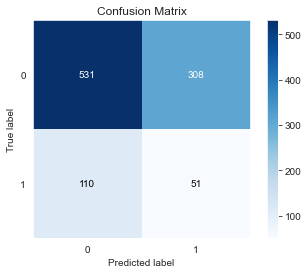

In [27]:
# Show Confusion Matrix, which shows the True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) captured
import scikitplot as skplt

print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

Model did a poor job of predicting both negatives and positives

In [28]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

lr2 = LogisticRegression()

lr2 = GridSearchCV(estimator = lr2,
                 param_grid=param_grid,
                 n_jobs = -1)

lr2.fit(X_smt, y_smt)

y_pred = lr2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       839
           1       0.18      0.18      0.18       161

    accuracy                           0.74      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.74      0.74      0.74      1000



[[708 131]
 [132  29]]


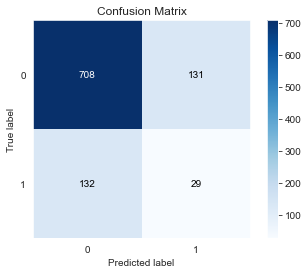

In [29]:
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

Model shows high recall for negative cases, which is not useful for identifying high risk tenants.

### XGBoost

For XGBoost, the built in scale_pos_weight parameter was used to balance the number of positive cases (1) to negative cases (0)

In [30]:
import xgboost as xgb
scale_pos_weight = len(df[df['has_90_plus_day_delinquency']==0])/len(df[df['has_90_plus_day_delinquency']==1])

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, 
                            scale_pos_weight=scale_pos_weight,seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)]);

[0]	validation_0-aucpr:0.16074
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.15207
[2]	validation_0-aucpr:0.14588
[3]	validation_0-aucpr:0.14893
[4]	validation_0-aucpr:0.14192
[5]	validation_0-aucpr:0.14073
[6]	validation_0-aucpr:0.14169
[7]	validation_0-aucpr:0.14510
[8]	validation_0-aucpr:0.14879
[9]	validation_0-aucpr:0.15135
[10]	validation_0-aucpr:0.15315
Stopping. Best iteration:
[0]	validation_0-aucpr:0.16074



In [31]:
y_pred = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       839
           1       0.17      0.27      0.21       161

    accuracy                           0.66      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.73      0.66      0.69      1000



[[618 221]
 [117  44]]


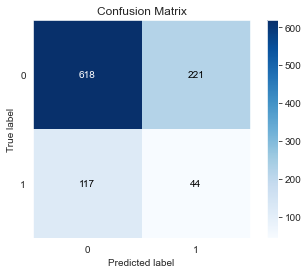

In [32]:
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

Model did a poor job of predicting both negatives and positives

**Results from Logistic Regression using built-in 'class_weight' parameter were selected as the model had the highest recall (0.39) for classifying positive cases of 90+ day delinquency**

Recall was selected as the evaluation method because for the InsurTech industry, it is much more important to be able to identify the high risk tenants, than it is to qualify low risk tenants. Since recall informs about the proportion of high risk tenants correctly identified out of all the high risk tenants, it optimizes for a model that minimizes risk. 

In [33]:
# predict class probabilities
probability = lr1.predict_proba(X_test)
probability

array([[0.51599782, 0.48400218],
       [0.48500899, 0.51499101],
       [0.48107408, 0.51892592],
       ...,
       [0.50051543, 0.49948457],
       [0.47976609, 0.52023391],
       [0.50011724, 0.49988276]])

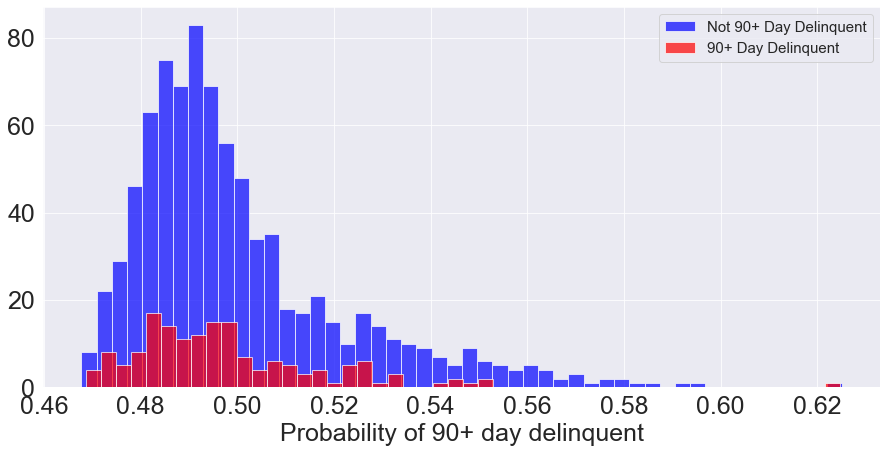

In [34]:
probability_log1 = lr1.predict_proba(X_test)[:,1]
plt.figure(figsize=(15,7))
plt.hist(probability_log1[y_test==0], bins=50, label='Not 90+ Day Delinquent', alpha=0.7, color='b')
plt.hist(probability_log1[y_test==1], bins=50, label='90+ Day Delinquent', alpha=0.7, color='r')
plt.xlabel('Probability of 90+ day delinquent', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

### b) Estimated Amount of 90+ Day Delinquency

In [35]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [37]:
# Drop the target variable and retain the rest of the features

X = df.drop(['90_plus_day_delinquency', 'has_90_plus_day_delinquency'], axis=1)
y = df['90_plus_day_delinquency']

# Split training and testing data in 2:8 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# Fit training data to XGBoost Regressor
xgbr = xgb.XGBRegressor(scale_pos_weight=scale_pos_weight,verbosity=0) 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=5.211180124223603,
             subsample=1, tree_method=None, validate_parameters=False,
             verbosity=0)

In [39]:
# Calculate training score 
score = xgbr.score(X_train, y_train)
score

0.7120221314439201

In [40]:
# Calculate cross validation score using 10-fold cross validation
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: -0.28


10-fold cross validation is an industry standard, and ensures that every observation from the original dataset has the chance of appearing in training and test set

The training score is 0.75 but the cross validation score is -0.22, which indicates that the model is overfitting to training data and not generalizeable to any new data. This was to be expected for the randomly generated data.

In [41]:
# Use model to predict test data
y_pred = xgbr.predict(X_test)

In [42]:
# Compute root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  1552.088210


RMSE was used as it is more suitable for dealing with large error values such as the delinquency amounts. 

The large RMSE shows that data points are very far away from the fitted line and the model is not predictive of the data points at all.